# Task #1 Import Datasets and Libraries

In [1]:
# The World Happiness Report determines the state of global happiness. 
# The happiness scores and rankings data has been collected by asking individuals to rank their life.
# Ranking ranges from 0 (worst possible life) to 10 (best possible life). 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)


In [2]:
#import Csv file into pandas dataframe
happy_df = pd.read_csv('happiness_report.csv')

In [3]:
#print the first 5 rows of the dataframe
#default is 5 rows df. head()
happy_df.head(6)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   
5             6       Switzerland  7.480           1.452           1.526   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   
5                    1.052                         0.572       0.263   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298  
5                      0.343

In [4]:
# PRINT last rows
#tail() prints last 5 rows
happy_df.tail()

Overall rank         Country or region  Score  GDP per capita  \
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  
151       0.217                      0.411  
152       0.276                      0.147  
153       0.158                      0.025  
154       0.235                      0.035  
155       0.202                      0.091

PRACTICE OPPORTUNITY 
> * Select 2 countries from the dataframe and explore scores. Perform sanity check.

In [5]:
happy_df[happy_df['Country or region' ] == 'Tanzania']

Overall rank Country or region  Score  GDP per capita  Social support  \
152           153          Tanzania  3.231           0.476           0.885   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
152                    0.499                         0.417       0.276   

     Perceptions of corruption  
152                      0.147

In [6]:
happy_df[happy_df['Country or region' ] == 'Rwanda']

Overall rank Country or region  Score  GDP per capita  Social support  \
151           152            Rwanda  3.334           0.359           0.711   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
151                    0.614                         0.555       0.217   

     Perceptions of corruption  
151                      0.411

# Task #3 PERFORM EXPLORATORY DATA

In [7]:
#Check the number of non-null values in the data frame
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [8]:
#Check Null values
happy_df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [9]:
#obtain the statistical summary of the dataframe
happy_df.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%                   0.547750                      0.308000    0.108750   
50%                   0.789000                      0.417000    0.177500   
75%                   0.881750                      0.507250    0.248250   
max                   1.141000                      0.631000    0.566000   

       Perceptions of corruption  
count                 156.000000  
mean                    0.110603  
std                     0.094538  
min                     0.000000  
25%                     0.047000  
50%                     0.085500  
75%                     0.141250  
max                     0.453000

In [10]:
#check the number of duplicated entries in the dataframe
happy_df.duplicated().sum() #since there are no duplicates, no further action is required

0

PRACTICE #2
>* Which Country has the maximum happiness score? What is the perception of corruption in this country?

In [11]:
happy_df['Score'].max()

7.769

In [12]:
happy_df[ happy_df['Score'] == happy_df['Score'].max()]

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769            1.34           1.587   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   

   Perceptions of corruption  
0                      0.393

# Task #4 PERFORM DATA VISUALIZATION:
PAIRPLOT & SCATTERMATRIX

In [13]:
# A scatterplot matrix is a matrix associated to n numerical arrays (data variables), $X_1,X_2,…,X_n$ , of the same length. 
# The cell (i,j) of such a matrix displays the scatter plot of the variable Xi versus Xj.
# Here we show the Plotly Express function px.scatter_matrix to plot the scatter matrix for the columns of the dataframe. By default, all columns are considered.

# Note:
# Positive correlation between GDP and score 
# Positive correlation between Social Support and score 
fig= px.scatter_matrix(happy_df[['Score', 'GDP per capita']], width = 1500, height = 1500)
fig.show()

<Figure size 1440x1440 with 0 Axes>

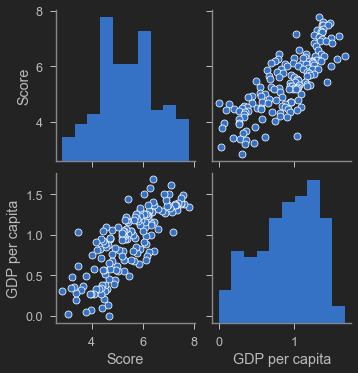

In [14]:
#Alternatively, you can use Seaborn to plot the pairplots as follows (Note that the plot
fig= plt.figure(figsize = (20,20))
sns.pairplot(happy_df[['Score', 'GDP per capita']])
#positive correlation between score and GD per capita

# TASK #5: PERFORM DATA VISUALIZATION: DISTPLOT & CORRELATION MATRIX

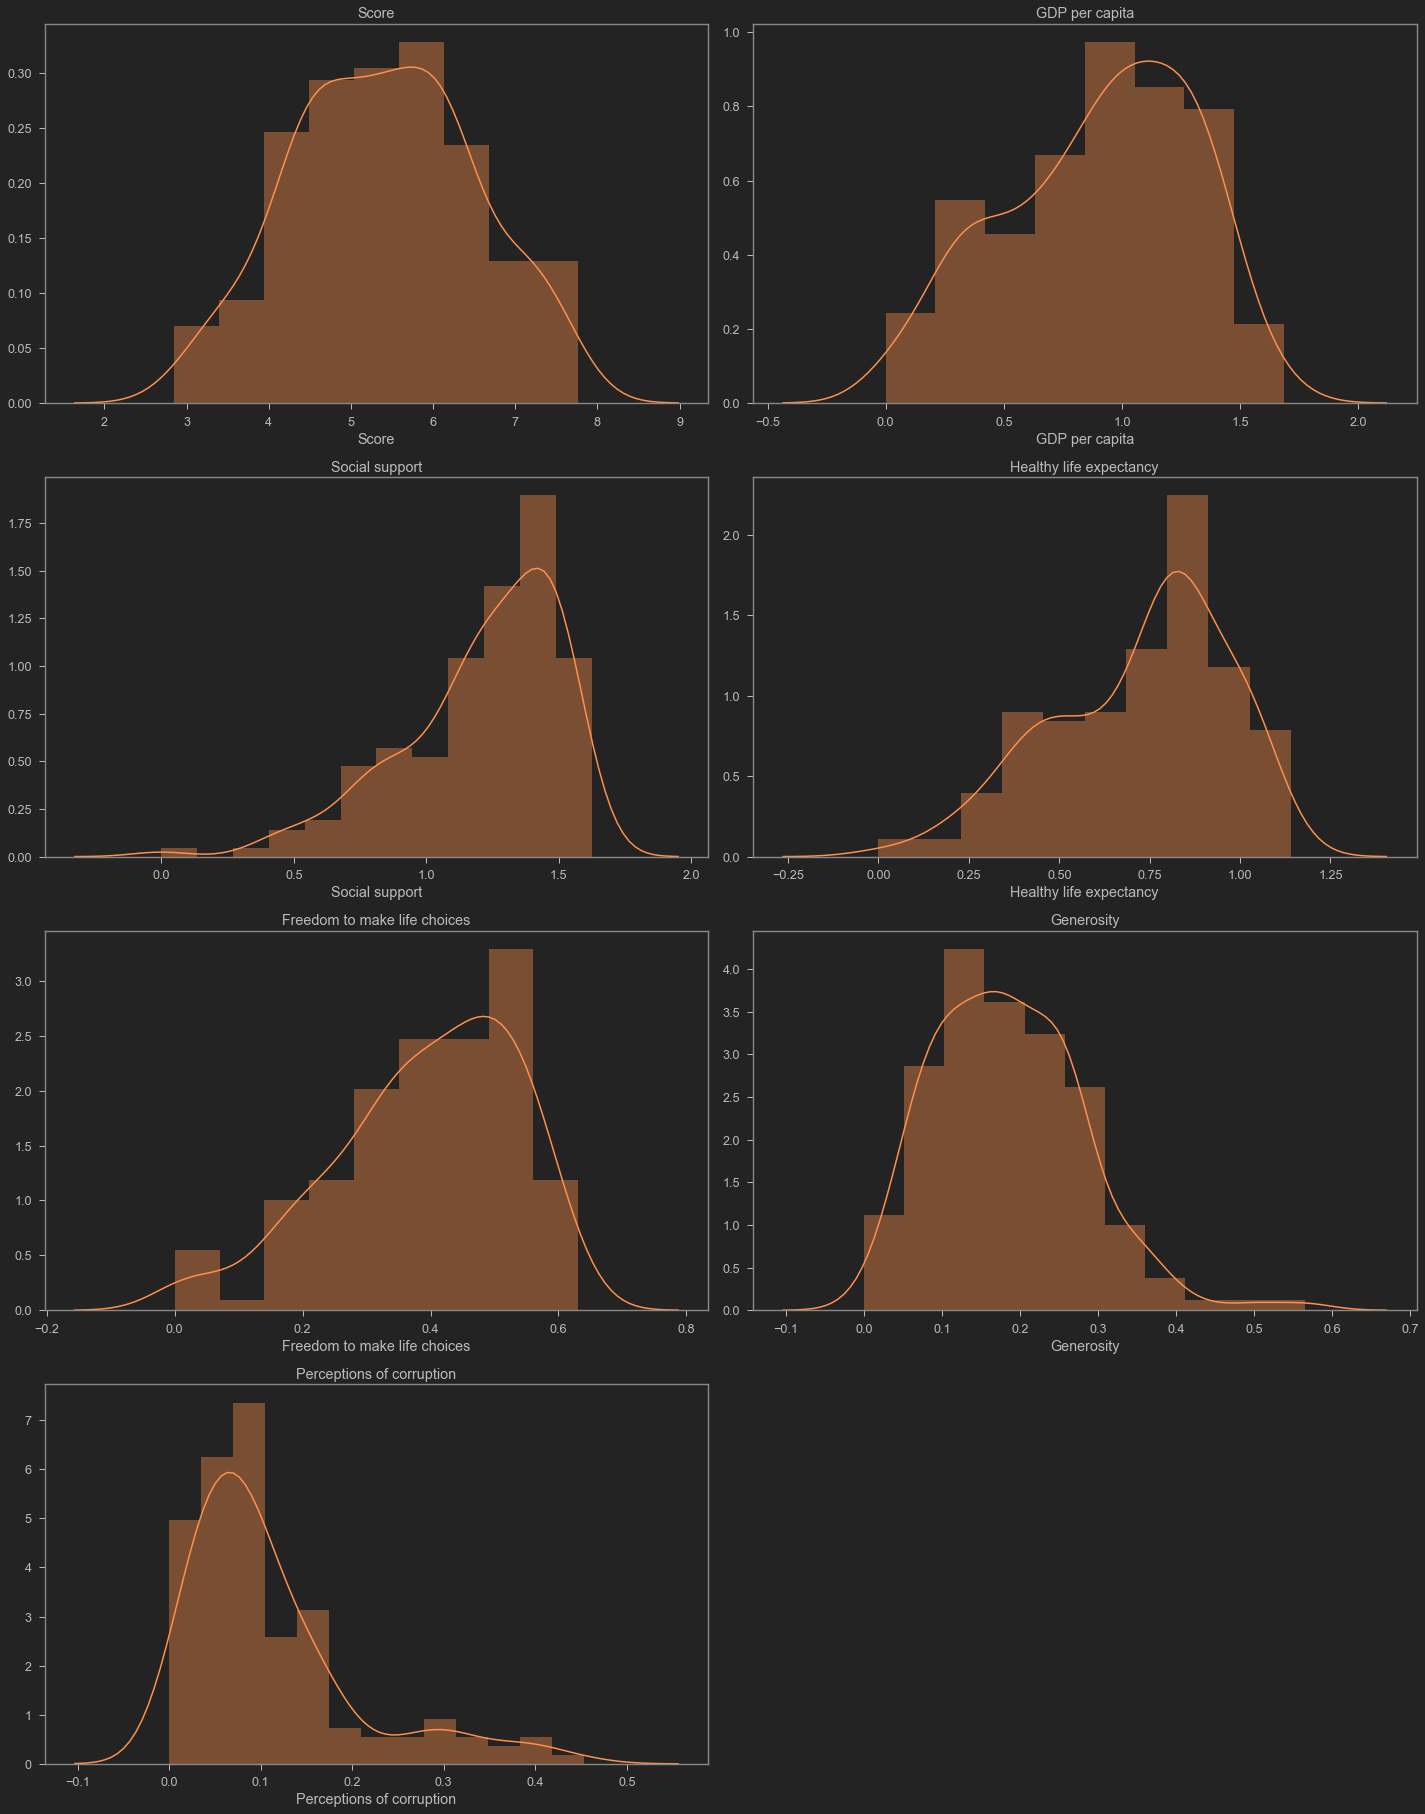

In [15]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
columns= ['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
plt.figure(figsize = (20, 50))
for i in range(len(columns)):
    plt.subplot(8,2,i+1)
    sns.distplot(happy_df[columns[i]], color ='y');
    plt.title(columns[i])
    
    plt.tight_layout()

In [16]:
fig = px.imshow(happy_df.corr())
fig.show()

In [17]:
#Get the correlation matrix
happy_df.corr()

Overall rank     Score  GDP per capita  \
Overall rank                      1.000000 -0.989096       -0.801947   
Score                            -0.989096  1.000000        0.793883   
GDP per capita                   -0.801947  0.793883        1.000000   
Social support                   -0.767465  0.777058        0.754906   
Healthy life expectancy          -0.787411  0.779883        0.835462   
Freedom to make life choices     -0.546606  0.566742        0.379079   
Generosity                       -0.047993  0.075824       -0.079662   
Perceptions of corruption        -0.351959  0.385613        0.298920   

                              Social support  Healthy life expectancy  \
Overall rank                       -0.767465                -0.787411   
Score                               0.777058                 0.779883   
GDP per capita                      0.754906                 0.835462   
Social support                      1.000000                 0.719009   
Healthy life expectancy             0.719009                 1.000000   
Freedom to make life choices        0.447333                 0.390395   
Generosity                         -0.048126                -0.029511   
Perceptions of corruption           0.181899                 0.295283   

                              Freedom to make life choices  Generosity  \
Overall rank                                     -0.546606   -0.047993   
Score                                             0.566742    0.075824   
GDP per capita                                    0.379079   -0.079662   
Social support                                    0.447333   -0.048126   
Healthy life expectancy                           0.390395   -0.029511   
Freedom to make life choices                      1.000000    0.269742   
Generosity                                        0.269742    1.000000   
Perceptions of corruption                         0.438843    0.326538   

                              Perceptions of corruption  
Overall rank                                  -0.351959  
Score                                          0.385613  
GDP per capita                                 0.298920  
Social support                                 0.181899  
Healthy life expectancy                        0.295283  
Freedom to make life choices                   0.438843  
Generosity                                     0.326538  
Perceptions of corruption                      1.000000

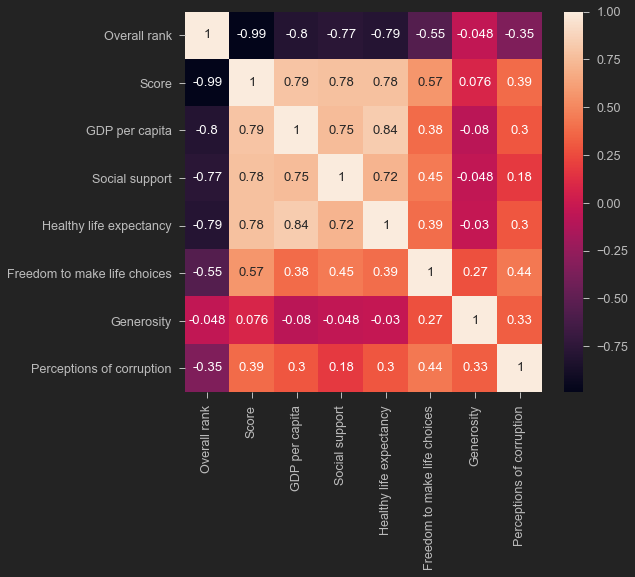

In [18]:
#Get the correlation matrix
corr_matrix = happy_df.corr()
corr_matrix
sns.heatmap(corr_matrix, annot = True)

# TASK #6: PERFORM DATA VISUALIZATION: SCATTERPLOTS AND BUBBLE CHARTS

In [19]:
#plot relationship between score, GDP and region
fig = px.scatter(happy_df, x= 'GDP per capita', y= 'Score', text= 'Country or region')
fig.update_traces(textposition = 'top center')
fig.update_layout(height = 1000)
fig.show()

In [20]:
# Plot the relationship between score and GDP (while adding color and size)
fig = px.scatter(happy_df, x = "GDP per capita", y = "Score", size = "Overall rank", color = "Country or region", hover_name = "Country or region")
fig.update_layout(title_text = 'Happiness Score vs GDP per Capita')
fig.show()

# FINAL CAPSTONE PROJECT

Using "cars.csv" dataset complete the following tasks: 
- 1. Using Pandas, read the "cars.csv" dataset
- 2. Perform exploratory data analysis
- 3. Remove $ sign and comma (,) from MSRP and Invoice columns
- 4. Convert MSRP and Invoice columns to integer datatypes and perform sanity check on the data
- 5. Plot the scattermatrix and pairplot
- 6. Plot a scatterplot between 'Horsepower' and 'MSRP' while showing 'Make' as text. Use the 'Cylinders' column to display color.
- 7. Plot the wordcloud of the Make column
- 8. Plot the histogram of Make and Type of the car using Plotly Express
- 9. Find out which manufacturer has high number of Sports type 
- 10. Find out which manufacturers has Hybrids
- 11. Plot the correlation matrix using plotly express and Seaborn
- 12. Comment on the correlation matrix, which feature has the highest positive correlation with MSRP?

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Qn #1 Read dataset

In [40]:
# reading data set
car_data = pd.read_csv('cars.csv')


# Qn #2 Exploratoy data analysis

In [41]:
car_data.tail()

Make                    Model   Type  Origin DriveTrain     MSRP  \
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  $40,565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  $42,565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  $45,210   
426  Volvo                      V40  Wagon  Europe      Front  $26,135   
427  Volvo                     XC70  Wagon  Europe        All  $35,145   

     Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
423  $38,203         2.4        5.0         197        21           28   
424  $40,083         2.3        5.0         242        20           26   
425  $42,573         2.9        6.0         268        19           26   
426  $24,641         1.9        4.0         170        22           29   
427  $33,112         2.5        5.0         208        20           27   

     Weight  Wheelbase  Length  
423    3450        105     186  
424    3450        105     186  
425    3653        110     190  
426    2822        101     180  
427    3823        109     186

In [42]:



car_data.head()

Make           Model   Type Origin DriveTrain     MSRP  Invoice  \
0  Acura             MDX    SUV   Asia        All  $36,945  $33,337   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  $23,820  $21,761   
2  Acura         TSX 4dr  Sedan   Asia      Front  $26,990  $24,647   
3  Acura          TL 4dr  Sedan   Asia      Front  $33,195  $30,299   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  $43,755  $39,014   

   EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0         3.5        6.0         265        17           23    4451   
1         2.0        4.0         200        24           31    2778   
2         2.4        4.0         200        22           29    3230   
3         3.2        6.0         270        20           28    3575   
4         3.5        6.0         225        18           24    3880   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197

In [43]:
car_data.describe ()

EngineSize   Cylinders  Horsepower    MPG_City  MPG_Highway  \
count  428.000000  426.000000  428.000000  428.000000   428.000000   
mean     3.196729    5.807512  215.885514   20.060748    26.843458   
std      1.108595    1.558443   71.836032    5.238218     5.741201   
min      1.300000    3.000000   73.000000   10.000000    12.000000   
25%      2.375000    4.000000  165.000000   17.000000    24.000000   
50%      3.000000    6.000000  210.000000   19.000000    26.000000   
75%      3.900000    6.000000  255.000000   21.250000    29.000000   
max      8.300000   12.000000  500.000000   60.000000    66.000000   

            Weight   Wheelbase      Length  
count   428.000000  428.000000  428.000000  
mean   3577.953271  108.154206  186.362150  
std     758.983215    8.311813   14.357991  
min    1850.000000   89.000000  143.000000  
25%    3104.000000  103.000000  178.000000  
50%    3474.500000  107.000000  187.000000  
75%    3977.750000  112.000000  194.000000  
max    7190.000000  144.000000  238.000000

In [44]:
car_data.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [45]:

car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


# Qn 3 Remove $ Sign and comma (,) from MSRP and Invoice coluns
# Qn #4 Convert MSRP and Invoice columns to integer datatypes and perform sanity check on the data

In [46]:

car_data["MSRP"] = car_data["MSRP"].str.replace("$", "")
car_data["MSRP"] = car_data["MSRP"].str.replace(",","")
car_data["MSRP"] = car_data ["MSRP"].astype(int)
car_data["MSRP"]

car_data["Invoice"] = car_data["Invoice"].str.replace("$", "")
car_data["Invoice"] = car_data["Invoice"].str.replace(",", "")
car_data["Invoice"] = car_data ["Invoice"].astype(int)
car_data["Invoice"]

0      33337
1      21761
2      24647
3      30299
4      39014
       ...  
423    38203
424    40083
425    42573
426    24641
427    33112
Name: Invoice, Length: 428, dtype: int32

In [47]:
car_data.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [48]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int32  
 6   Invoice      428 non-null    int32  
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int32(2), int64(6), object(5)
memory usage: 46.9+ KB


# 5 Plot the scattermatrix and pairplot

In [49]:
#scattter matrix
fig = px.scatter_matrix(car_data[['Make','Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
     'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
                                  'Wheelbase', 'Length' ]], width = 2000, height = 2000)
fig.show()


<Figure size 1440x1440 with 0 Axes>

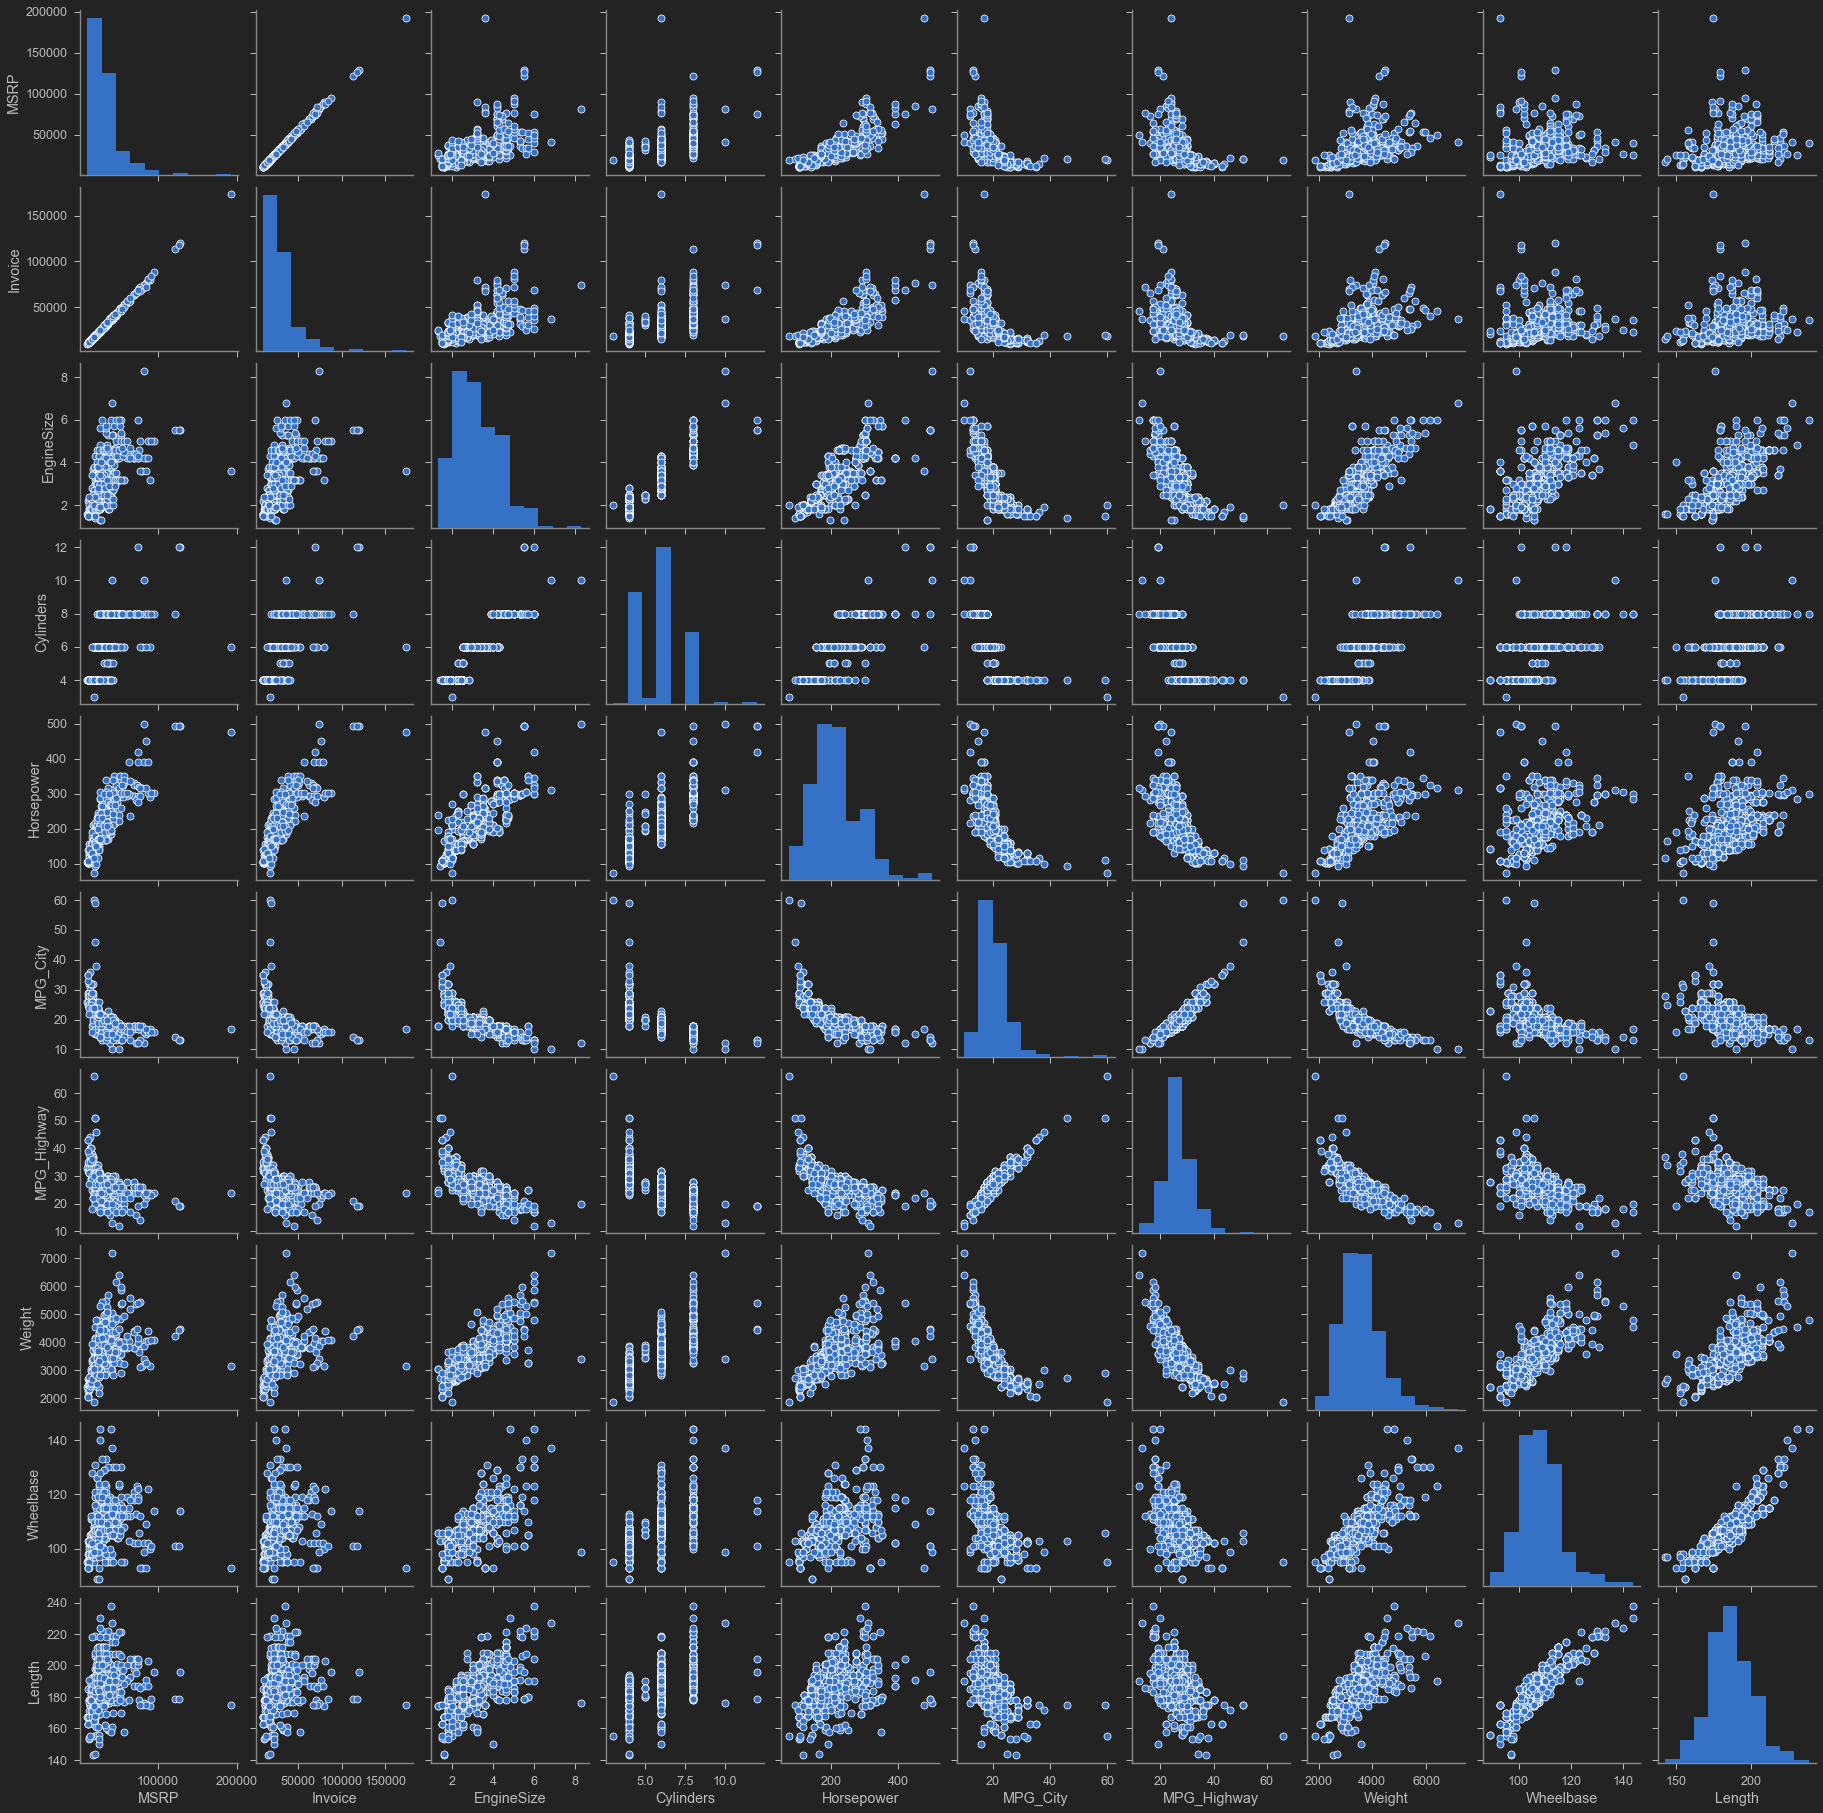

In [50]:
#Pairplot with seaborn
fig = plt.figure(figsize= (20,20))
sns.pairplot(car_data[['Make','Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
     'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',  'Wheelbase', 
                       'Length']])


# Qn #6 Plot a scatterplot between 'Horsepower' and 'MSRP' while showing 'Make' as text. Use the 'Cylinders' column to display color.


In [51]:
fig = px.scatter(car_data, x = 'Horsepower', y = 'MSRP', text = 'Make', 
                 color = 'Cylinders')
fig.update_layout(title_text = 'Scatterplot of Horsepower vs MSRP')
fig.update_traces(textposition = 'top center')
fig.update_layout(height = 2000)
fig.update_layout( width = 2000)

fig.show()

In [52]:
fig = px.scatter(happy_df, x = "GDP per capita", y = "Score", size = "Overall rank", color = "Country or region", hover_name = "Country or region")
fig.update_layout(title_text = 'Happiness Score vs GDP per Capita')
fig.show()

 # Qn #7. Plot the wordcloud of the Make column





In [38]:
#view various types of cars
car_data.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

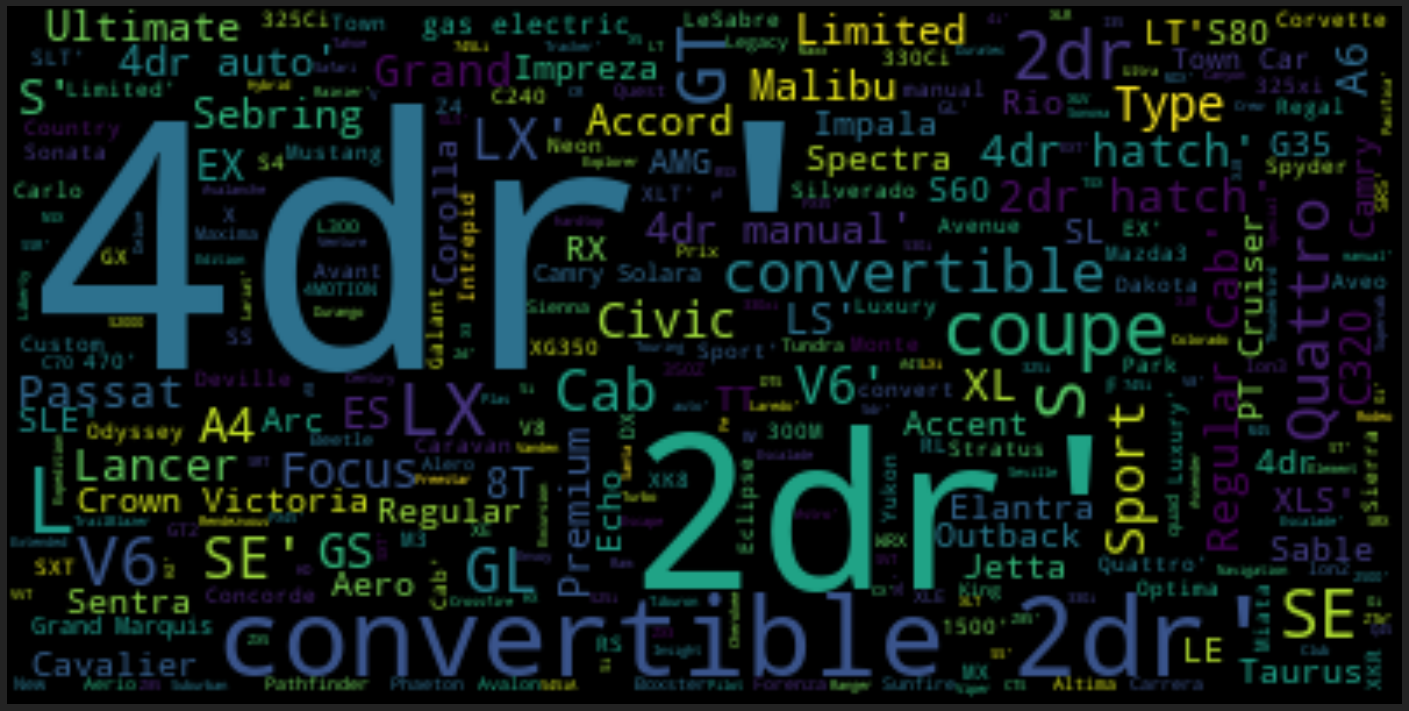

In [64]:
from wordcloud import WordCloud, STOPWORDS

car_data

text = car_data.Model.values

stopwords = set(STOPWORDS)

wc = WordCloud(background_color = "black", max_words = 2000, max_font_size = 100, random_state = 3, 
              stopwords = stopwords, contour_width = 3).generate(str(text))       

fig = plt.figure(figsize = (25, 15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()


# Qn #  8. Plot the histogram of Make and Type of the car using Plotly Express

In [56]:
fig = px.histogram(car_data, x = "Make", 
                    labels = {"Make": "Manufacturer"},
                   title = "MAKE OF THE CAR",
                   color_discrete_sequence = 
                    ["green"])
fig.show()

In [61]:
#histogram for type of vehicles
fig = px.histogram(car_data, x = "Type",
                  labels = {"Type" : "Type"},
                  title = "TYPE OF THE CAR",
                  color_discrete_sequence = ["maroon"])
fig.show()

In [77]:
#make of car and location
# babel = {""}
fig = px.histogram(car_data, x = "Make",
                   color = "Origin", 
                   labels = {"Make": "Manufacturer"}, 
                   title = "MAKE OF THE CAR VS LOCATION")
fig.show()

 # Qn # 9. Find out which manufacturer has high number of Sports type 

In [ ]:
fig = px.histogram(car_data, x = "Make",
                  color = "Type",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE AND TYPE OF THE CAR",
                  opacity = 1)
                  
fig.show()

# Porsche
# Honda and Toyota


# Positive correlation between engine size and number of cylinders
# Positive correlation between horsepower and number of cylinders
# highest positive correlation with MSRP is = horsepower

# Qn # 10. Find out which manufacturers has Hybrids


# Qn #  11. Plot the correlation matrix using plotly express and Seaborn

In [ ]:
# Obtain the correlation matrix
car_data.corr()

fig = px.imshow(car_data.corr())
fig.show()

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(car_df.corr(), cmap="YlGnBu", annot = True)

# Qn # 12. Comment on the correlation matrix, which feature has the highest positive correlation with MSRP?

In [ ]:
# Positive correlation between engine size and number of cylinders
# Positive correlation between horsepower and number of cylinders
# highest positive correlation with MSRP is = horsepower